# OBJECTIVE :- Try various CNN networks on MNIST dataset

In [1]:
# Importing libraries
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.initializers import he_normal
from keras.layers.normalization import BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# this function is used draw Categorical Crossentropy Loss VS No. of epochs plot
def plt_dynamic(x, vy, ty):
  plt.figure(figsize=(15,8))
  plt.plot(x, vy, 'g', label="Validation Loss")
  plt.plot(x, ty, 'r', label="Train Loss")
  plt.xlabel('Epochs') 
  plt.ylabel('Categorical Crossentropy Loss')
  plt.title('\nCategorical Crossentropy Loss VS Epochs')
  plt.legend()
  plt.grid()
  plt.show()

## (1). CNN with 3 Convolutional layers and kernel size - (3X3)

In [4]:
# Initialising the model
model_3 = Sequential()

# Adding first conv layer
model_3.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))

# Adding second conv layer
model_3.add(Conv2D(64, (3, 3), activation='relu'))

# Adding Maxpooling layer
model_3.add(MaxPooling2D(pool_size=(2, 2)))

# Adding Dropout
model_3.add(Dropout(0.3))

# Adding third conv layer
model_3.add(Conv2D(128, (3, 3), activation='relu'))

# Adding Maxpooling layer
model_3.add(MaxPooling2D(pool_size=(2, 2)))

# Adding Dropout
model_3.add(Dropout(0.3))

# Adding flatten layer
model_3.add(Flatten())

# Adding first hidden layer
model_3.add(Dense(256, activation='relu',kernel_initializer=he_normal(seed=None)))

# Adding Dropout
model_3.add(Dropout(0.3))

# Adding output layer
model_3.add(Dense(num_classes, activation='softmax'))

# Printing model Summary
print(model_3.summary())

# Compiling the model
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the data to the model
history_3 = model_3.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxP

Test score: 0.021451755314664207
Test accuracy: 0.992


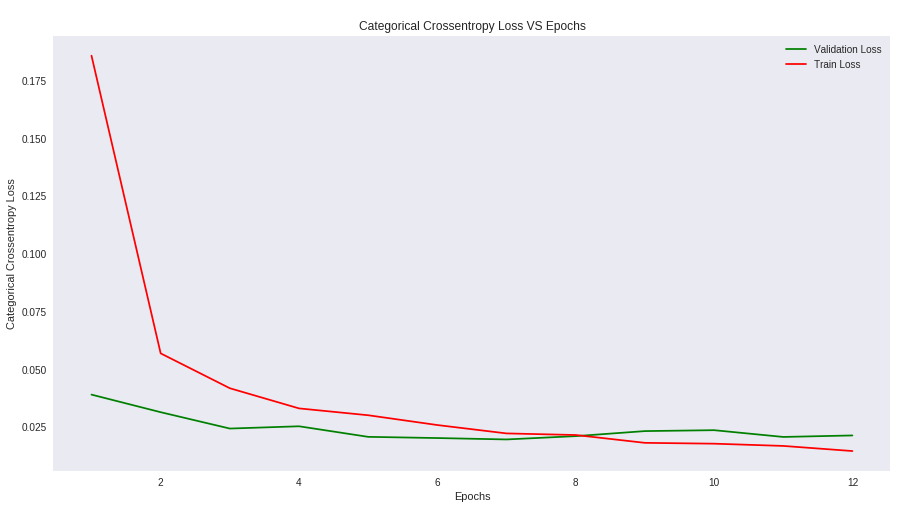

In [5]:
# Evaluating the model
score = model_3.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

# Test and train accuracy of the model
model_3_test = score[1]
model_3_train = max(history_3.history['acc'])

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,epochs+1))

# Validation loss
vy = history_3.history['val_loss']
# Training loss
ty = history_3.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

## (2). CNN with 5 Convolutional layers and kernel size - (5X5)

In [6]:
# Initialising the model
model_5 = Sequential()

# Adding first conv layer
model_5.add(Conv2D(8, kernel_size=(5, 5),padding='same',activation='relu',input_shape=input_shape))

# Adding second conv layer
model_5.add(Conv2D(16, (5, 5), activation='relu'))

# Adding Maxpooling layer
model_5.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

# Adding Dropout
model_5.add(Dropout(0.3))

# Adding third conv layer
model_5.add(Conv2D(32, (5, 5),padding='same', activation='relu'))

# Adding Maxpooling layer
model_5.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

# Adding Dropout
model_5.add(Dropout(0.3))

# Adding fourth conv layer
model_5.add(Conv2D(64, (5, 5),padding='same',activation='relu'))

# Adding fifth conv layer
model_5.add(Conv2D(64, (5, 5), activation='relu'))

# Adding Maxpooling layer
model_5.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

# Adding Dropout
model_5.add(Dropout(0.3))

# Adding flatten layer
model_5.add(Flatten())

# Adding first hidden layer
model_5.add(Dense(256, activation='relu',kernel_initializer=he_normal(seed=None)))

# Adding Batch Normalization
model_5.add(BatchNormalization())

# Adding Dropout
model_5.add(Dropout(0.3))

# Adding output layer
model_5.add(Dense(num_classes, activation='softmax'))

# Printing model Summary
print(model_5.summary())

# Compiling the model
model_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the data to the model
history_5 = model_5.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 8)         208       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 16)        3216      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 32)        12832     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 6, 6, 32)          0         
__________

Test score: 0.02045143669675963
Test accuracy: 0.9944


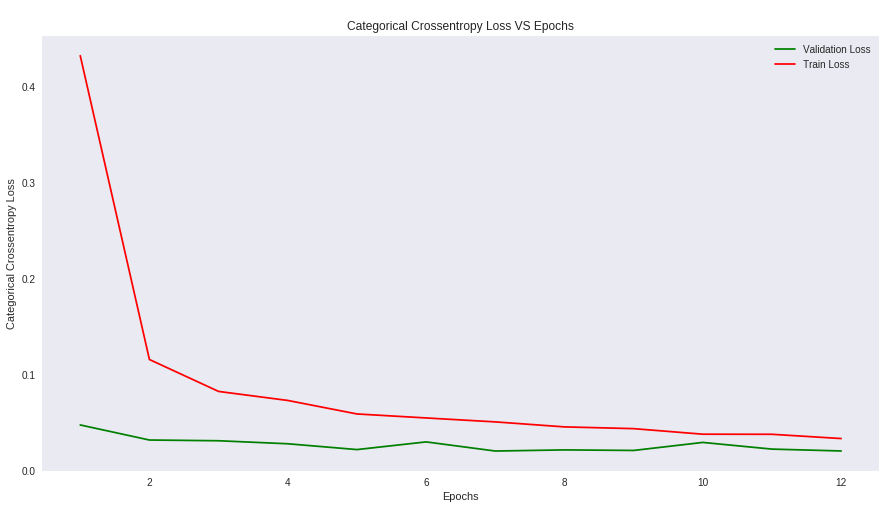

In [7]:
# Evaluating the model
score = model_5.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

# Test and train accuracy of the model
model_5_test = score[1]
model_5_train = max(history_5.history['acc'])

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,epochs+1))

# Validation loss
vy = history_5.history['val_loss']
# Training loss
ty = history_5.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

## (3). CNN with 7 Convolutional layers and kernel size - (2X2)

In [8]:
# Initialising the model
model_7 = Sequential()

# Adding first conv layer
model_7.add(Conv2D(32, kernel_size=(2, 2),padding='same',activation='relu',input_shape=input_shape))

# Adding second conv layer
model_7.add(Conv2D(32, (2, 2), activation='relu'))

# Adding Maxpooling layer
model_7.add(MaxPooling2D(pool_size=(3, 3), strides=(1,1)))

# Adding Dropout
model_7.add(Dropout(0.3))

# Adding third conv layer
model_7.add(Conv2D(64, (2, 2), activation='relu'))

# Adding Maxpooling layer
model_7.add(MaxPooling2D(pool_size=(2, 2),padding='same'))


# Adding fourth conv layer
model_7.add(Conv2D(64, (2, 2),padding='same',activation='relu'))

# Adding fifth conv layer
model_7.add(Conv2D(128, (2, 2), activation='relu'))

# Adding Maxpooling layer
model_7.add(MaxPooling2D(pool_size=(3, 3),padding='same'))

# Adding Dropout
model_7.add(Dropout(0.3))

# Adding sixth conv layer
model_7.add(Conv2D(128, (2, 2),padding='same',activation='relu'))

# Adding seventh conv layer
model_7.add(Conv2D(256, (2, 2), activation='relu'))

# Adding Maxpooling layer
model_7.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

# Adding Dropout
model_7.add(Dropout(0.3))

# Adding flatten layer
model_7.add(Flatten())

# Adding first hidden layer
model_7.add(Dense(256, activation='relu',kernel_initializer=he_normal(seed=None)))

# Adding Batch Normalization
model_7.add(BatchNormalization())

# Adding Dropout
model_7.add(Dropout(0.3))

# Adding second hidden layer
model_7.add(Dense(128, activation='relu',kernel_initializer=he_normal(seed=None)))

# Adding Dropout
model_7.add(Dropout(0.3))

# Adding output layer
model_7.add(Dense(num_classes, activation='softmax'))

# Printing model Summary
print(model_7.summary())

# Compiling the model
model_7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the data to the model
history_7 = model_7.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        160       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 27, 27, 32)        4128      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        8256      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 64)        16448     
__________

Test score: 0.022784425553405162
Test accuracy: 0.993


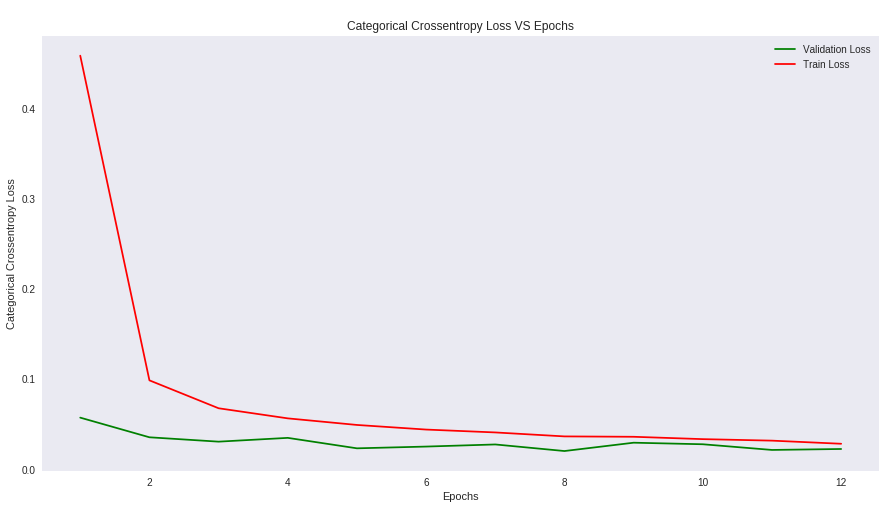

In [9]:
# Evaluating the model
score = model_7.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

# Test and train accuracy of the model
model_7_test = score[1]
model_7_train = max(history_7.history['acc'])

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,epochs+1))

# Validation loss
vy = history_7.history['val_loss']
# Training loss
ty = history_7.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

## CONCLUSION

## (a). Procedure Followed :

1. Load MNIST dataset.
2. Split the dataset into train and test.
3. Normalize the train and test data.
4. Convert class variable into categorical data vector.
5. Implement Softmax classifier with  3, 5 and 7 conv layers .
6. Use kernel -size (3X3) , (5X5) and (2,2) .
7. Draw Categorical Crossentropy Loss VS No.of Epochs plot .



## (b) Table (Different models with their train and test accuracies):

In [10]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["N0__Conv_Layers", "Kernel_size", "Training Accuracy", "Test Accuracy"]

x.add_row([3, "(3x3)",0.9929,0.9938])
x.add_row([5, "(5x5)",0.9892,0.9894])
x.add_row([7, "(2x2)",0.9898,0.9913])
print(x)


+-----------------+-------------+-------------------+---------------+
| N0__Conv_Layers | Kernel_size | Training Accuracy | Test Accuracy |
+-----------------+-------------+-------------------+---------------+
|        3        |    (3x3)    |       0.9929      |     0.9938    |
|        5        |    (5x5)    |       0.9892      |     0.9894    |
|        7        |    (2x2)    |       0.9898      |     0.9913    |
+-----------------+-------------+-------------------+---------------+
